## K nearest neighbor ([KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)) on [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 


###In this exercise, we will apply KNN to classify the CIFAR-10 dataset. CIFAR-10 consists of 32x32 images from 10 classes. The train set consists of 50k images and the test set consists of 10k images

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

###Function to load CIFAR-10

In [ ]:
def fetch_dataloader(transform=None, batch_size=-1, is_train=True):
    """
    Loads data from disk and returns a data_loader.
    A DataLoader is similar to a list of (image, label) tuples.
    You do not need to fully understand this code to do this assignment, we're happy to explain though.
    """
    data = torchvision.datasets.CIFAR10(root='./data',
                                            train=is_train, download=True, transform=transform)
    batch = len(data) if batch_size is -1 else batch_size
    loader = torch.utils.data.DataLoader(data, batch_size=batch,
                                              shuffle=True, num_workers=4)
      
    return loader

##Fetch and preprocess the data

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

transform = transforms.Compose(
            [transforms.ToTensor(),
             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = -1

loader_trn = fetch_dataloader(transform, batch_size, is_train=True)

x_trn, y_trn = iter(loader_trn).next()
print(x_trn.shape, y_trn.shape)

testset = fetch_dataloader(transform, batch_size, is_train=False)
x_test, y_test = iter(testset).next()
print(x_test.shape, y_test.shape)

print(x_trn.dtype, x_test.dtype)

Files already downloaded and verified
torch.Size([50000, 3, 32, 32]) torch.Size([50000])
Files already downloaded and verified
torch.Size([10000, 3, 32, 32]) torch.Size([10000])
torch.float32 torch.float32


You might also want to modify the code above and get the testing data.  You can use testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) or you can use fetch_dataloader()

# Part1 Visualize the exampes

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
#TODO

def disp_img(num):
      img = x_trn[num,:,:,:] / 2 + 0.5    
      img = img.numpy()
      img = np.transpose(img, (1, 2, 0))
      plt.imshow(img)
      print(classes[y_trn[num]])

disp_img(1)

NameError: ignored

Part 2: KNN implementation. 
We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

First we must compute the distances between all test examples and all train examples.
Given these distances, for each test example we find the k nearest examples and have them vote for the label

In [ ]:
#format datasets for eaier handling

shave = 5000
shave = list(range(shave))
x_trn = x_trn[shave]
y_trn = y_trn[shave]

shave = 500
shave = list(range(shave))
x_test = x_test[shave]
y_test = y_test[shave]

x_test_save = x_test

x_trn = np.reshape(x_trn, (x_trn.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print(x_trn.shape, x_test.shape)

torch.Size([5000, 3072]) torch.Size([500, 3072])


In [ ]:
class KNearestNeighborClassifier(object):

    def __init__(self, k):
      self.k = k

    def train(self, x_trn, y_trn):
      self.x_trn = x_trn
      self.y_trn = y_trn
      pass
      
    def predict(self, images):

      tests = images.shape[0]
      trains = self.x_trn.shape[0]
      l1dists = np.zeros((tests, trains))
      l2dists = np.zeros((tests, trains))

      for i in range(tests):
        for j in range(trains):  
          delta = np.abs(images[i] - x_trn[j])
          l1dists[i][j] = np.sum(delta.numpy())
          l2dists[i][j] = np.sqrt(np.sum(np.square(delta.numpy())))
       
 
      predictions = np.zeros(tests)
      for i in range(l2dists.shape[0]):
        close = []
        close = np.take(self.y_trn, np.argsort(l2dists[i]))[:self.k]
      
        (values, counts) = np.unique(close, return_counts=True)
        predictions[i] = values[np.argmax(counts)]
     

      return predictions, l1dists, l2dists

    

Here you can call your function and output results

In [ ]:
#test with k = 10

c = KNearestNeighborClassifier(10)
c.train(x_trn, y_trn)
output = c.predict(x_test)
predict = output[0]
l1 = output[1]
l2 = output[2]

correct=0
for i in range(predict.size):
  if(predict[i] == y_test[i]):
    correct += 1
accuracy = float(correct) / predict.size
print('%d of %d correct with accuracy of: %f' % (correct, predict.size, accuracy))


153 of 500 correct with accuracy of: 0.306000


predicted label: ship
actual label: ship
l1: 929.082397
l2: 23.124441


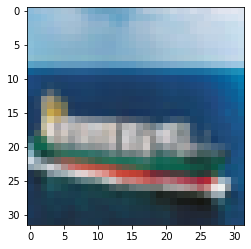

In [ ]:
#example output

def example(num):
      img = x_test_save[num,:,:,:] / 2 + 0.5    
      img = img.numpy()
      img = np.transpose(img, (1, 2, 0))
      plt.imshow(img)
      print('predicted label: ' + classes[int(predict[num])])
      print('actual label: ' + classes[y_test[num]])
      print('l1: %f' % np.min(l1[num]))
      print('l2: %f' % np.min(l2[num]))

example(0)